# Data processing in TIMSImaging
### Introduction
In this case study, we explore a MALDI-TIMS-TOF dataset of mouse kidney tissue, reproduce ion images in the manuscript, show the separation of ion mobility, and export the results in the open imzML format. The dataset is from Melaine Föll Lab and available at MassIVE.  
Li, M., Meyer, L., Meier, N., Witte, J., Maldacker, M., Seredynska, A., Schueler, J., Schilling, O. and Föll, M. (2025), Spatial Proteomics by Parallel Accumulation-Serial Fragmentation Supported MALDI MS/MS Imaging: A First Glance Into Multiplexed and Spatial Peptide Identification. Rapid Commun Mass Spectrom, 39: e10006. https://doi.org/10.1002/rcm.10006

In [1]:
import timsimaging

# enable visualization in the Jupyter notebook
from bokeh.io import show, output_notebook
output_notebook()
# disable FutureWarning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Loading BokehJS ...

### Load MALDI-TIMS-TOF raw data
Suppose we know nothing about this dataset. First we load the dataset and print basic information like pixel number and data range.

In [2]:
bruker_d_folder_name = r"D:\dataset\Kidney_MS1_ITO6.d"
dataset = timsimaging.spectrum.MSIDataset(bruker_d_folder_name)
dataset

100%|██████████████████████████████████████████████████████████████████████████| 38267/38267 [00:20<00:00, 1854.90it/s]


MSIDataset with 38267 pixels
        mz range: 799.998-2500.007
        mobility range: 1.200-2.600
        

### View summary image and tables

Then we can view the TIC image, and hover on individual pixels to see the details:

In [3]:
dataset.image()

We can view the underlying data as tables, too

In [4]:
# pixel positions
dataset.pos

,XIndexPos,YIndexPos
Frame,,
1,336,175
2,337,175
3,338,175
4,339,175
5,340,175
...,...,...
38263,737,116
38264,738,116
38265,739,116


In [5]:
# metadata of pixels
dataset.data.frames

,Id,Time,ScanMode,MsMsType,TimsId,MaxIntensity,SummedIntensities,NumScans,NumPeaks,MzCalibration,T1,T2,TimsCalibration,PropertyGroup,AccumulationTime,RampTime,Pressure,Denoised
0,0,0.000000,20,0,64,0,0,1212,0,1,25.630815,23.592239,1,1,59.47,230.09,2.055982,0
1,1,2.671587,20,0,64,688,5346970,1212,76165,1,25.630815,23.592239,1,1,59.47,230.09,2.055982,0
2,2,2.941060,20,0,210641,637,4998845,1212,71095,1,25.630815,23.592239,1,1,59.47,230.09,2.055982,0
3,3,3.210677,20,0,407604,605,4793642,1212,67948,1,25.630815,23.592239,1,1,59.47,230.09,2.055982,0
4,4,3.480285,20,0,595229,626,4705085,1212,66534,1,25.630938,23.591317,1,1,59.47,230.09,2.055983,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38263,38263,10602.755832,20,0,11938087511,925,4587513,1212,64378,1,25.666533,23.497069,1,1,59.47,230.09,2.055988,0
38264,38264,10603.025466,20,0,11938264725,720,4511870,1212,63215,1,25.666508,23.496083,1,1,59.47,230.09,2.055988,0
38265,38265,10603.295060,20,0,11938440038,775,4700548,1212,66076,1,25.666508,23.496083,1,1,59.47,230.09,2.055988,0
38266,38266,10603.564667,20,0,11938622040,626,4648396,1212,65487,1,25.666508,23.496083,1,1,59.47,230.09,2.055988,0


### Set region of interest(ROI)
The left region is the kidney tissue, we can use the `set_ROI` method to set the ROI by `xmin`, `xmax`, `ymin`, `ymax` parameters.

In [6]:
dataset.set_ROI(name='kidney', xmax=500)

### Process on selected ROI
Then we run the processing pipline introduced in the basic use notebook.

In [7]:
results = dataset.process(sampling_ratio=0.1, frequency_threshold=0.02, tolerance=3, adaptive_window=True, roi='kidney', visualize=True)

Computing mean spectrum...
Traversing graph...
Finding local maxima...
Summarizing...


100%|██████████████████████████████████████████████████████████████████████████████| 3110/3110 [09:42<00:00,  5.34it/s]


We can view the interactive peak list:

In [8]:
peaklist = results["peak_list"]
table, _ = timsimaging.plotting.feature_list(results["peak_list"])
show(table)

We can also visualize the intensity distribution:

<Axes: >

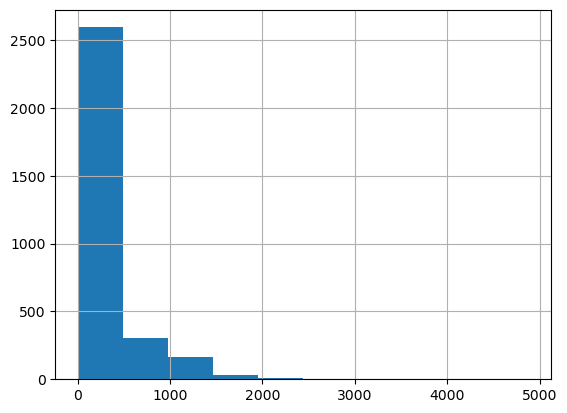

In [9]:
results["peak_list"]["total_intensity"].hist()

### View Interactive Results
User can explore the reuslts in the GUI. By clicking pixels in the image(top left), users can view its mass spectrum(bottom middle), mobilogram(top right) and 2D spectogram combining these two(top middle). Also, users can click entries in the peak list(bottom left) to investigate ion images and spectral details of that peak. The menu(bottom right) provide summarizing functions like TIC image and mean spectrum, as well as file export options.

In [10]:
show(results['viz'])

D:\MSI\TIMSImaging\src\timsimaging\plotting.py:1153: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layouts = gridplot(


### Separate ions by ion mobility 
Ions with the same m/z(for example, isomers) could be separated by ion mobility. As shown below, TIMSImaging detected both peaks.
![](isomer_screenshot.png)

### Export the processed data in imzML format
Finally, we export the processed data as continuous, centroid imzML file for downstream analysis in Cardinal.

In [11]:
timsimaging.spectrum.export_imzML(dataset, path=r"D:/dataset/Kidney_MS1_ITO6.d", peaks=results)

100%|███████████████████████████████████████████████████████████████████████████| 38267/38267 [01:04<00:00, 593.85it/s]
